In [1]:
!pip install pandas matplotlib seaborn plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

file_path = "/content/drive/My Drive/TMP Project 3/Food_Production.csv"
df = pd.read_csv(file_path)

df.head()


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [11]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()

df.isnull().sum()

Shape: (43, 23)
Columns: ['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail', 'Total_emissions', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)', 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)', 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Freshwater withdrawals per 100g protein (liters per 100g protein)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)', 'Land use per 1000kcal (m² per 1000kcal)', 'Land use per kilogram (m² per kilogram)', 'Land use per 100g protein (m² per 100g protein)', 'Scarcity-weighted water use per kilogram (liters per kilogram)', 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', 'Scarcity-weighted water use per 1000kcal (liters p

,0
Food product,0
Land use change,0
Animal Feed,0
Farm,0
Processing,0
Transport,0
Packging,0
Retail,0
Total_emissions,0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),10


In [12]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("₄", "4").str.replace("₂", "2")

df.rename(columns={"packging": "packaging"}, inplace=True)

df = df.apply(lambda x: x.fillna(x.median()) if x.dtype == "float64" else x)

emission_cols = ["land_use_change","animal_feed","farm","processing","transport","packaging","retail"]
df["total_emissions_calc"] = df[emission_cols].sum(axis=1)

df.drop_duplicates(inplace=True)

print("Shape after cleaning:", df.shape)
df.info()


Shape after cleaning: (43, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 24 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   food_product                                                             43 non-null     object 
 1   land_use_change                                                          43 non-null     float64
 2   animal_feed                                                              43 non-null     float64
 3   farm                                                                     43 non-null     float64
 4   processing                                                               43 non-null     float64
 5   transport                                                                43 non-null     float64
 6   packaging                                    

In [13]:
def categorize_food(food):
    food = food.lower()
    if food in ["wheat & rye (bread)", "maize (meal)", "barley (beer)", "oatmeal", "rice"]:
        return "Cereals/Grains"
    elif food in ["potatoes", "cassava"]:
        return "Roots & Tubers"
    elif food in ["cane sugar", "beet sugar"]:
        return "Sugars"
    elif food in ["other pulses", "peas", "nuts", "groundnuts", "tofu", "soymilk"]:
        return "Legumes/Nuts/Plant Proteins"
    elif food in ["soybean oil", "palm oil", "sunflower oil", "rapeseed oil", "olive oil"]:
        return "Oils"
    elif food in ["tomatoes", "onions & leeks", "root vegetables", "brassicas", "other vegetables"]:
        return "Vegetables"
    elif food in ["citrus fruit", "bananas", "apples", "berries & grapes", "other fruit"]:
        return "Fruits"
    elif food in ["wine", "coffee", "dark chocolate"]:
        return "Beverages/Other"
    elif food in ["beef (beef herd)", "beef (dairy herd)", "lamb & mutton", "pig meat", "poultry meat"]:
        return "Meat"
    elif food in ["milk", "cheese", "eggs"]:
        return "Dairy & Eggs"
    elif food in ["fish (farmed)", "shrimps (farmed)"]:
        return "Seafood"
    else:
        return "Other"

df["category"] = df["food_product"].apply(categorize_food)

df[["food_product", "category"]].head(15)


,food_product,category
0,Wheat & Rye (Bread),Cereals/Grains
1,Maize (Meal),Cereals/Grains
2,Barley (Beer),Cereals/Grains
3,Oatmeal,Cereals/Grains
4,Rice,Cereals/Grains
5,Potatoes,Roots & Tubers
6,Cassava,Roots & Tubers
7,Cane Sugar,Sugars
8,Beet Sugar,Sugars
9,Other Pulses,Legumes/Nuts/Plant Proteins


**Business Questions**

1.   Which food products have the highest overall carbon footprint (total emissions per kg)?
2.   How do plant-based foods compare to animal-based foods in terms of total environmental impact?
3. Which stage of the food lifecycle (farm, processing, transport, packaging, retail) contributes most to emissions across different foods?
4. Which foods consume the most land and water resources?
5. Is there a trade-off between water usage and carbon emissions across foods (e.g., rice is low land use but high water use)?
6. Which food categories (meat, dairy, cereals, vegetables, oils, etc.) contribute most to eutrophication (nutrient pollution)?
7. Which foods have the lowest environmental footprint and can be promoted as sustainable alternatives?





## Q1: Which food products have the highest overall carbon footprint (total emissions per kg)?

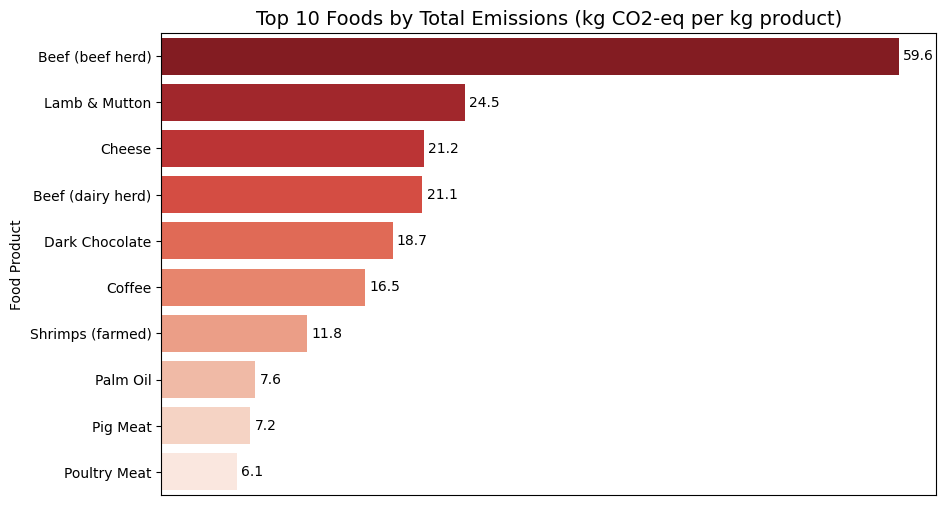

In [17]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="total_emissions_calc",
    y="food_product",
    data=top10_emissions,
    hue="food_product",
    dodge=False,
    palette="Reds_r",
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=3, fontsize=10)

ax.set_xlabel("")
ax.set_xticks([])

plt.title("Top 10 Foods by Total Emissions (kg CO2-eq per kg product)", fontsize=14)
plt.ylabel("Food Product")
plt.show()


## Q2: How do plant-based foods compare to animal-based foods in terms of total environmental impact?

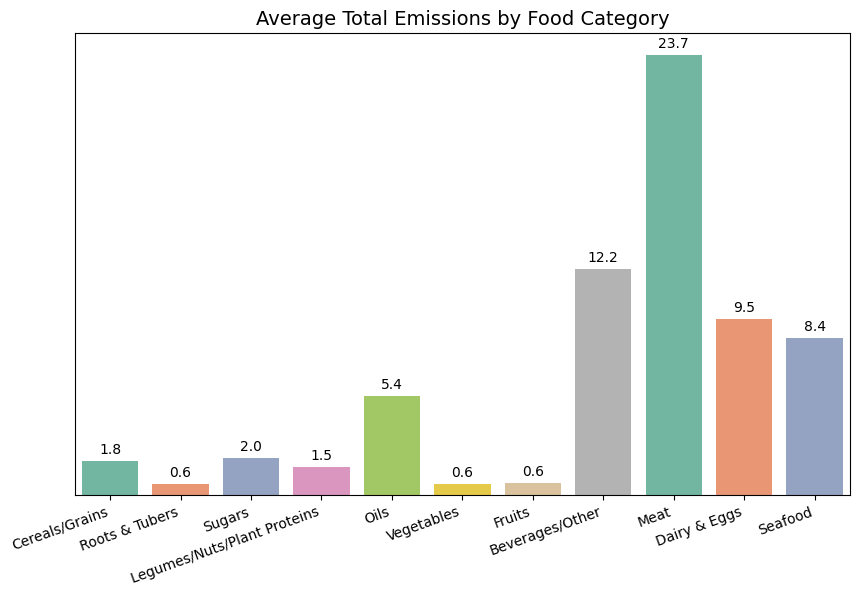

In [24]:
import numpy as np
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="category",
    y="total_emissions_calc",
    data=df,
    estimator=np.mean,
    hue="category",
    dodge=False,
    palette="Set2",
    legend=False,
    errorbar=None
)


for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=10, padding=3)


ax.set_ylabel("")
ax.set_yticks([])
ax.set_xlabel("")

plt.title("Average Total Emissions by Food Category", fontsize=14)
plt.xticks(rotation=20, ha="right")
plt.show()


## Q3: Which stage of the food lifecycle contributes most to emissions across different foods?

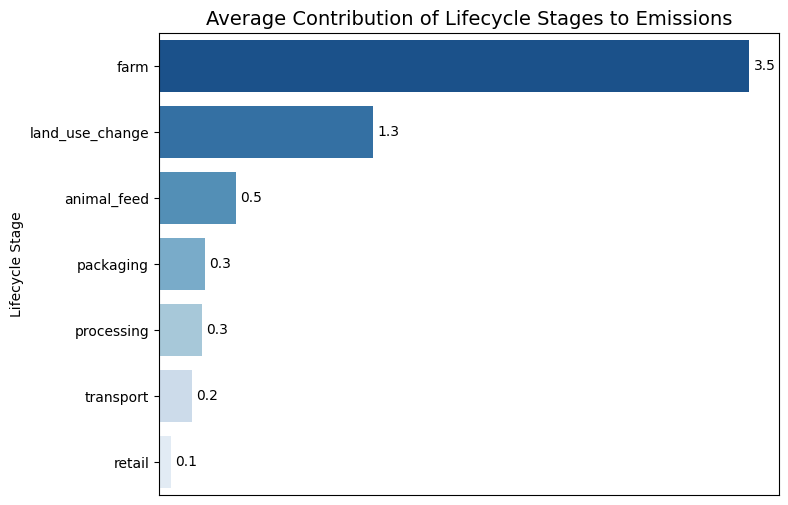

In [27]:
lifecycle_cols = ["land_use_change","animal_feed","farm","processing","transport","packaging","retail"]

stage_means = df[lifecycle_cols].mean().sort_values(ascending=False).reset_index()
stage_means.columns = ["stage", "mean_emission"]

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x="mean_emission",
    y="stage",
    data=stage_means,
    hue="stage",
    dodge=False,
    palette="Blues_r",
    legend=False,
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)


ax.set_xlabel("")
ax.set_xticks([])

plt.title("Average Contribution of Lifecycle Stages to Emissions", fontsize=14)
plt.ylabel("Lifecycle Stage")
plt.show()


## Q4: Which foods consume the most land and water resources?

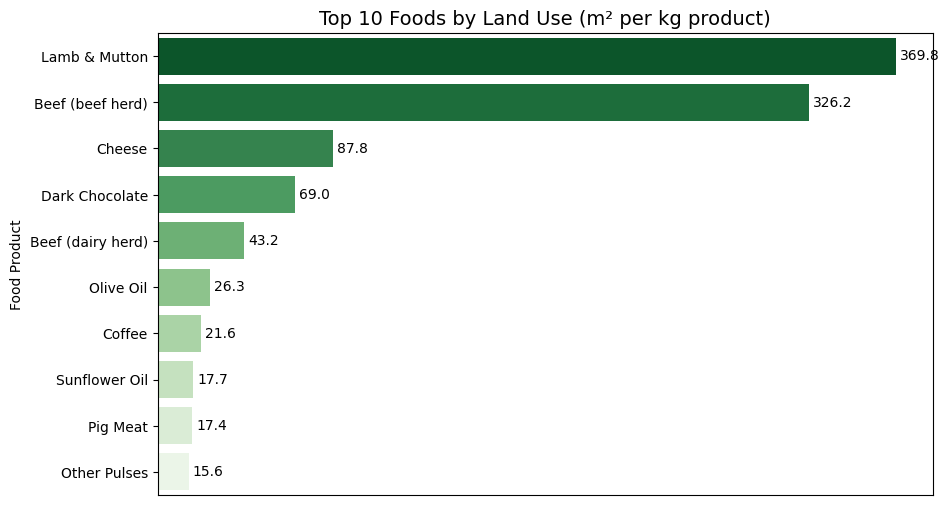

In [28]:
top10_land = df.nlargest(10, "land_use_per_kilogram_(m²_per_kilogram)")

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="land_use_per_kilogram_(m²_per_kilogram)",
    y="food_product",
    data=top10_land,
    hue="food_product",
    dodge=False,
    palette="Greens_r",
    legend=False,
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

ax.set_xlabel("")
ax.set_xticks([])

plt.title("Top 10 Foods by Land Use (m² per kg product)", fontsize=14)
plt.ylabel("Food Product")
plt.show()


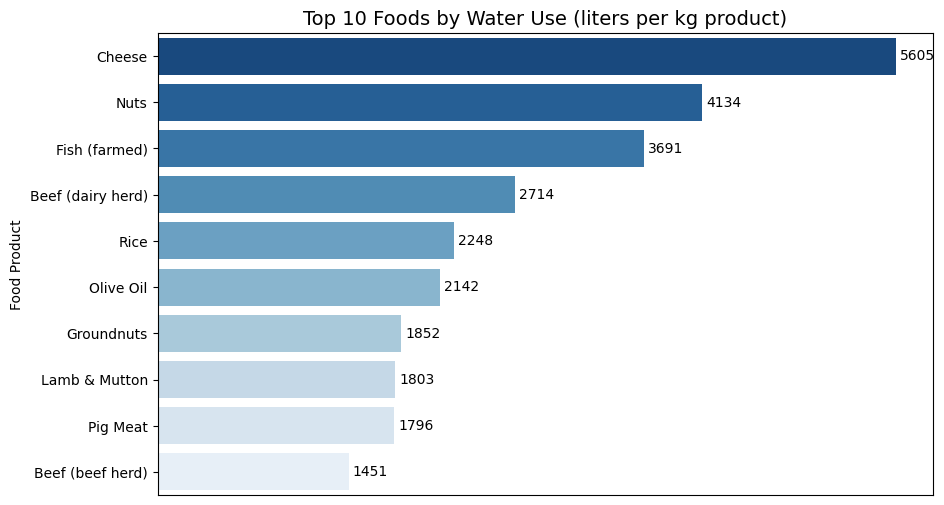

In [29]:
top10_water = df.nlargest(10, "freshwater_withdrawals_per_kilogram_(liters_per_kilogram)")

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="freshwater_withdrawals_per_kilogram_(liters_per_kilogram)",
    y="food_product",
    data=top10_water,
    hue="food_product",
    dodge=False,
    palette="Blues_r",
    legend=False,
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)

ax.set_xlabel("")
ax.set_xticks([])

plt.title("Top 10 Foods by Water Use (liters per kg product)", fontsize=14)
plt.ylabel("Food Product")
plt.show()


## Q5: Is there a trade-off between water usage and carbon emissions across foods?

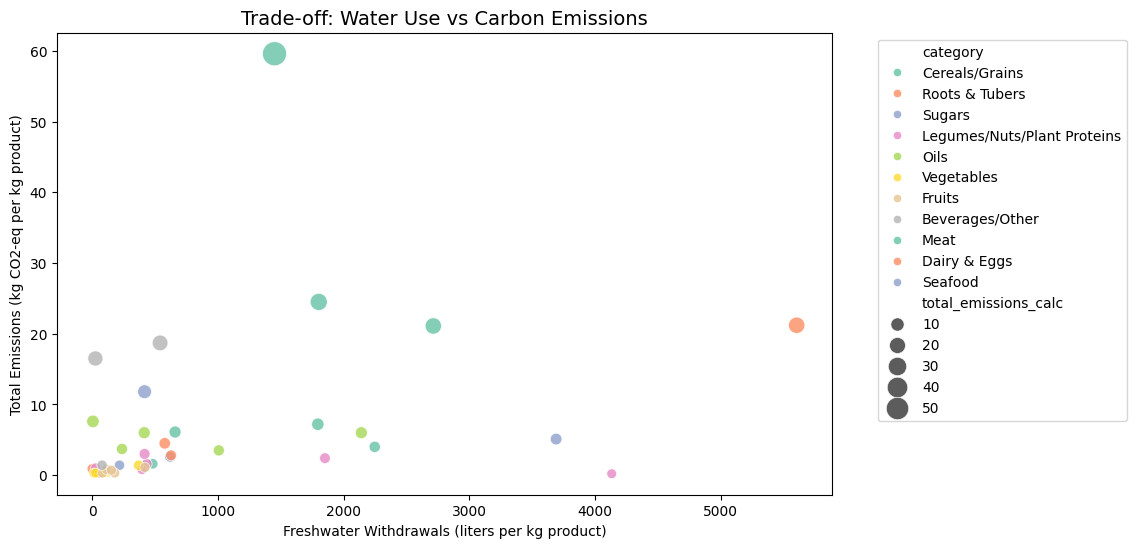

In [31]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    x="freshwater_withdrawals_per_kilogram_(liters_per_kilogram)",
    y="total_emissions_calc",
    hue="category",
    size="total_emissions_calc",
    sizes=(50, 300),
    data=df,
    alpha=0.8,
    palette="Set2"
)

plt.title("Trade-off: Water Use vs Carbon Emissions", fontsize=14)
plt.xlabel("Freshwater Withdrawals (liters per kg product)")
plt.ylabel("Total Emissions (kg CO2-eq per kg product)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Q6: Which food categories contribute most to eutrophication (nutrient pollution)?

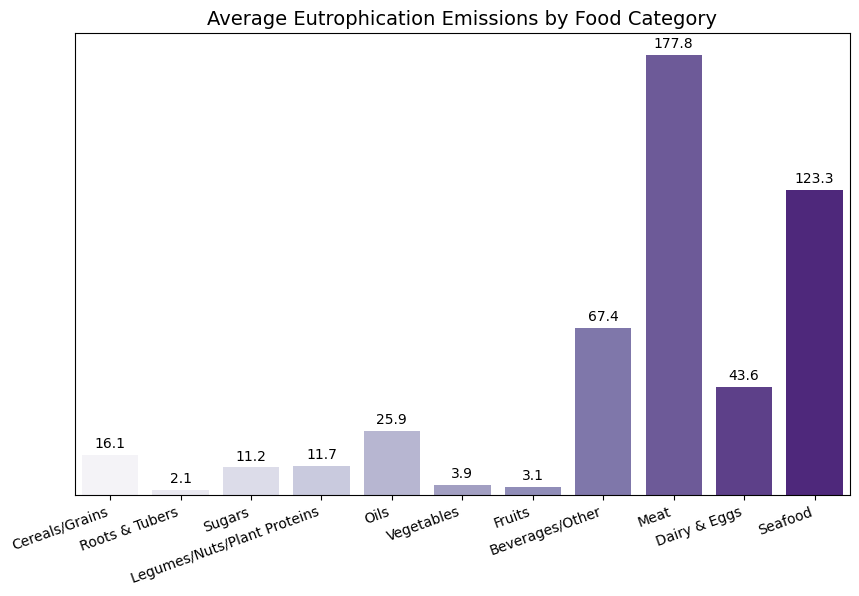

In [32]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="category",
    y="eutrophying_emissions_per_kilogram_(gpo4eq_per_kilogram)",
    data=df,
    estimator=np.mean,
    hue="category",
    dodge=False,
    palette="Purples",
    legend=False,
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=10, padding=3)

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_yticks([])

plt.title("Average Eutrophication Emissions by Food Category", fontsize=14)
plt.xticks(rotation=20, ha="right")
plt.show()


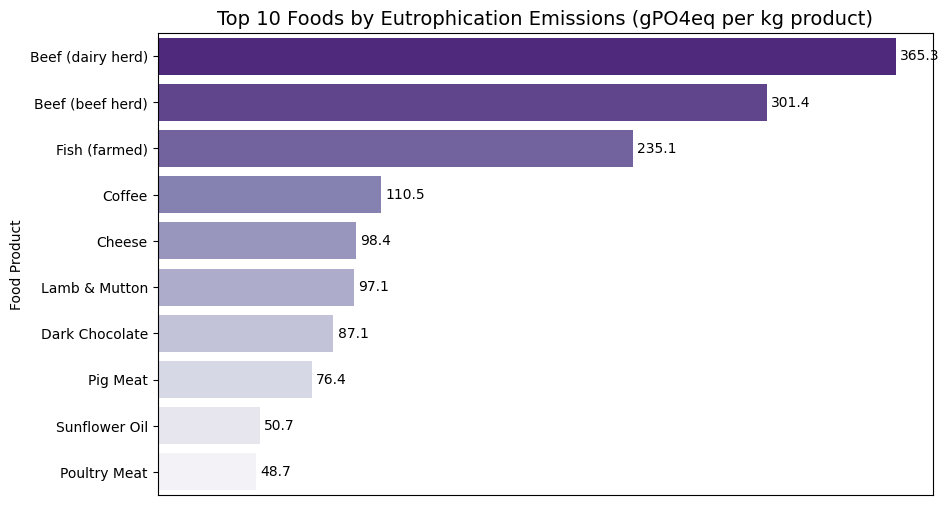

In [33]:
top10_eutro = df.nlargest(10, "eutrophying_emissions_per_kilogram_(gpo4eq_per_kilogram)")

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="eutrophying_emissions_per_kilogram_(gpo4eq_per_kilogram)",
    y="food_product",
    data=top10_eutro,
    hue="food_product",
    dodge=False,
    palette="Purples_r",
    legend=False,
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

ax.set_xlabel("")
ax.set_xticks([])

plt.title("Top 10 Foods by Eutrophication Emissions (gPO4eq per kg product)", fontsize=14)
plt.ylabel("Food Product")
plt.show()


## Q7: Which foods have the lowest environmental footprint and can be promoted as sustainable alternatives?

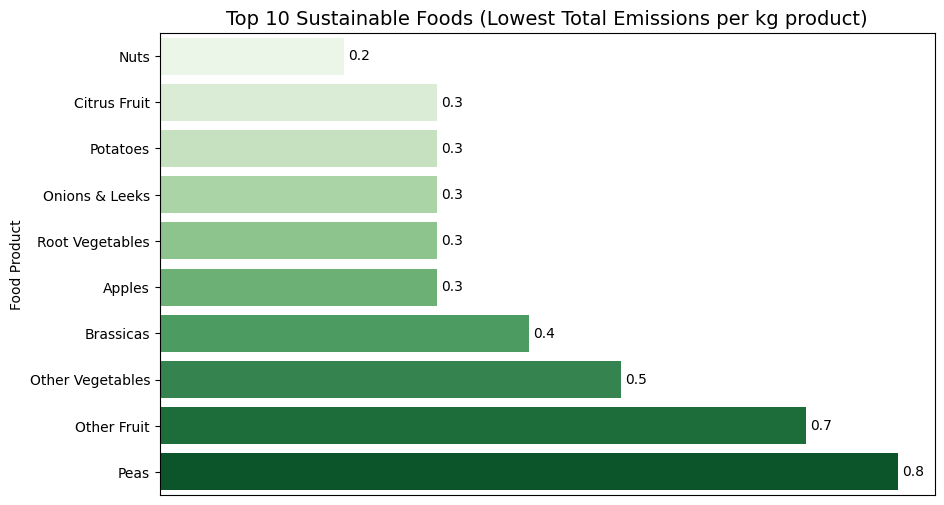

In [34]:
bottom10_emissions = df.nsmallest(10, "total_emissions_calc")

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="total_emissions_calc",
    y="food_product",
    data=bottom10_emissions,
    hue="food_product",
    dodge=False,
    palette="Greens",
    legend=False,
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

ax.set_xlabel("")
ax.set_xticks([])

plt.title("Top 10 Sustainable Foods (Lowest Total Emissions per kg product)", fontsize=14)
plt.ylabel("Food Product")
plt.show()
